In [ ]:
import torch
from torch import nn
from tqdm import tqdm

from lib.utils import *
from lib.models import *

window_size = 101
device = 'cuda'
f1i = []
recalli = []
precisioni = []
model_name = 'res'
i = 0
criterion = nn.BCEWithLogitsLoss()


In [ ]:
test_idx = load_cv_test_idx()

In [ ]:
all_metrics = pd.DataFrame()

for i in test_idx:
    print(i)
    windowsize = 101
    X,y = load_and_window_nursing_list_for_convolution([i])
    testloader = DataLoader(TensorDataset(X,y),batch_size=32,shuffle=False)
    loss,metric,y_true,y_pred,y_logits = evaluate(testloader,model,criterion)
    fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(30,5),gridspec_kw={'height_ratios': [1,5]})
    axes[0].plot(y_true,'r',linewidth=.5)
    axes[0].axis('off')
    plt.stackplot(torch.arange(len(y_logits)),torch.hstack([torch.ones_like(y_logits) - y_logits,y_logits]).T)
    plt.savefig(f'{i}.svg',bbox_inches='tight')
    cm_grid(y_true,y_pred,save_path=f'{i}.cm.svg')
    all_metrics = pd.concat([all_metrics,pd.Series(metric,name=f'{i}')],axis=1)

In [ ]:
all_metrics

In [35]:
all_metrics.T.describe()

,precision,recall,f1
count,12.000000,12.000000,12.000000
mean,0.858484,0.801584,0.811455
std,0.087577,0.121389,0.106186
min,0.689773,0.559083,0.599305
25%,0.807912,0.707891,0.762572
50%,0.885523,0.845232,0.809674
75%,0.928443,0.883059,0.887658
max,0.980695,0.986160,0.983411


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.boxplot(data=all_metrics.T.melt(),x='value',y='variable')

In [ ]:
a = all_metrics.reset_index().melt(id_vars='index')
a['variable'] = a['variable'].astype(int)
plt.figure(figsize=(16,4))
plt.grid()
sns.barplot(data=a,x='variable',y='value',hue='index')
plt.xlabel('fold index')
plt.ylabel('score')

In [31]:
X,y = load_and_window_nursing_list_for_convolution(test_idx)
testloader = DataLoader(TensorDataset(X,y),batch_size=32,shuffle=False)
loss,metric,y_true,y_pred,y_logits = evaluate(testloader,model,criterion)

100%|██████████| 11229/11229 [00:37<00:00, 300.67it/s]


{'precision': 0.8480317847673878, 'recall': 0.8038943529833749, 'f1': 0.8243265662698259}


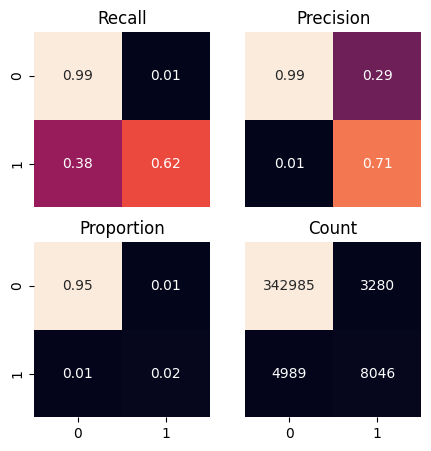

In [34]:
cm_grid(y_true,y_pred,save_path=f'{i}.cm.svg')
print(metric)

In [ ]:
i = 7
windowsize = 101
X,y = load_and_window_nursing_list_for_convolution([i])
testloader = DataLoader(TensorDataset(X,y),batch_size=32,shuffle=False)
loss,metric,y_true,y_pred,y_logits = evaluate(testloader,model,criterion)
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(30,5),gridspec_kw={'height_ratios': [1,5]})
axes[0].plot(y_true,'r',linewidth=.5)
axes[0].axis('off')
plt.stackplot(torch.arange(len(y_logits)),torch.hstack([torch.ones_like(y_logits) - y_logits,y_logits]).T)
plt.savefig(f'{i}.svg',bbox_inches='tight')
cm_grid(y_true,y_pred,save_path=f'{i}.cm.svg')
print(loss)
print(metric)
import plotly.express as px
X,y = load_nursing_by_index(i)
df = pd.DataFrame(X.numpy())
df['y_pred'] = torch.cat([torch.zeros(window_size//2),y_pred.flatten().round(),torch.zeros(window_size//2)])*10
df['y_true'] = y*10
fig = px.line(df)
fig.show(renderer='browser')

100%|██████████| 12863/12863 [00:39<00:00, 321.90it/s]


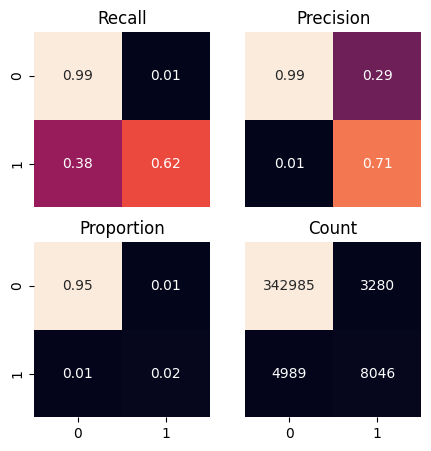

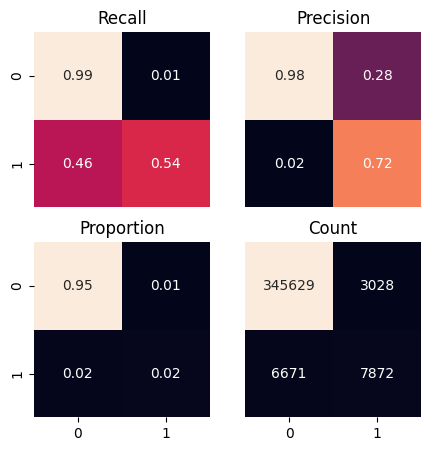

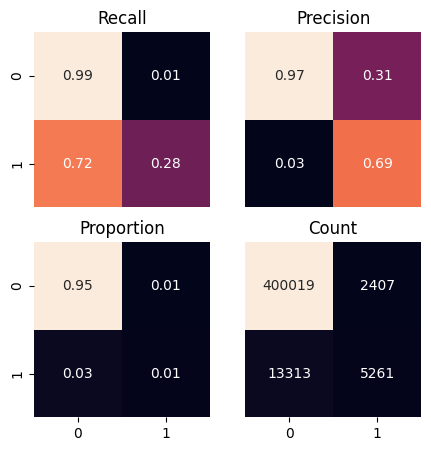

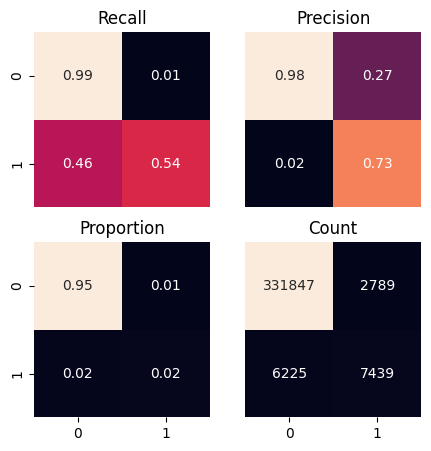

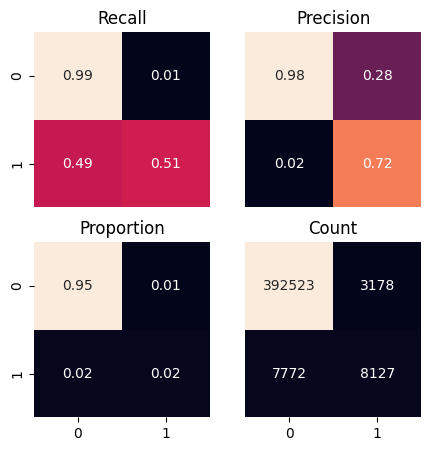

In [38]:
all_metrics = pd.DataFrame()

for foldi in range(5):
    test_idx = load_cv_test_idx(foldi)
    model = ResNet()
    model.load_state_dict(torch.load(f=f'../projects/{model_name}_cv_{foldi}/best_model.pt',map_location='cuda:0'))
    X,y = load_and_window_nursing_list_for_convolution(test_idx)
    testloader = DataLoader(TensorDataset(X,y),batch_size=32,shuffle=False)
    loss,metric,y_true,y_pred,y_logits = evaluate(testloader,model,criterion)
    all_metrics = pd.concat([all_metrics,pd.Series(metric,name=f'{foldi}')],axis=1)
    cm_grid(y_true,y_pred,save_path=f'fold_{foldi}.cm.svg')


In [40]:
all_metrics

,0,1,2,3,4
precision,0.848032,0.851633,0.826945,0.854452,0.849735
recall,0.803894,0.766303,0.638632,0.768044,0.751566
f1,0.824327,0.802479,0.690845,0.804660,0.791865
